## Linear regression with one variable: algorithm

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image



from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
pkt = 0

Let's load the data and look at it

In [2]:
data = np.loadtxt('data/RegLinOneVar.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
X.shape


(97, 2)

In [3]:
y = np.c_[data[:,1]]
y.shape

(97, 1)

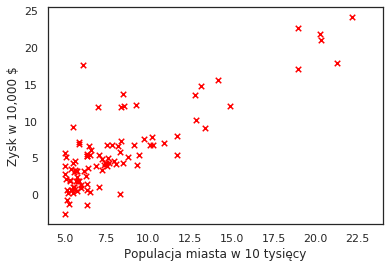

In [4]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Populacja miasta w 10 tysięcy')
plt.ylabel('Zysk w 10,000 $');

#### Gradient 
In this part we will implement the gradient algorithm in iterative and matrix version:
### $$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\big[h_{\theta}(x_{i})-y_{i}]^{2}\hspace{5cm}[1]$$
where hypothesis h(x) is equal to: $h_{\theta}(x) = \theta_{0}x_{0} + \theta_{1} x_{1}$

In [5]:
def computeCost(X, y, theta):
    m = y.size
    #J = 0
    #suma = 0
    #for i in range(m):
    #Tu wpisz kod
        #J = (theta[0]*X[i][0] + theta[1]*X[i][1] - y[i])**2
        #suma += J
    #suma = suma/(2*m)
    #J = suma
    J = np.dot(X,theta)
    J1 = np.transpose(J-y)
    J2 = J-y
    J = np.dot(J1,J2)
    J = J/(2*m)
    return(J)                            

In [6]:
theta = np.zeros((2, 1))
cost = computeCost(X,y, theta)
cost

array([[32.07273388]])

Now we known what is the error of own model. Let's use this iinformation to make a optimization function.
Formula:
### $$\theta_{j} := \theta_{j} - \alpha \frac{1}{m} \sum_{i=1}^{m} \big[h_{\theta}(x_{i})-y_{i}] x_{i,j}\hspace{5cm}[2]$$

In [7]:
def gradientDescent(X, y, alpha=0.01, num_iters=1500):
    m = y.size
    theta = np.zeros((2, 1))
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        J = np.dot(X,theta)
        J1 = np.dot(np.transpose(X),J - y)
        J = J1/m
        theta = theta - (alpha * J)
     #   temp0 = []
      #  temp1 = []
       # for i in range(m):
            #tu wpisz kod
        #    temp0.append((theta[0]*X[i][0] + theta[1]*X[i][1] - y[i]) * X[i][0])
         #   temp1.append((theta[0]*X[i][0] + theta[1]*X[i][1] - y[i]) * X[i][1])
        J_history[iter] = computeCost(X, y, theta)
        #theta[0] = theta[0] - (alpha/m)*(sum(temp0))
        #theta[1] = theta[1] - (alpha/m)*(sum(temp1))
    
    return(theta, J_history)

Here is own results for $\theta_{0}$ and $\theta_{1}$

In [8]:

theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

theta:  [-3.63029144  1.16636235]


Now let's plot data set and decision boundary using $\theta_{0}$ and $\theta_{1}$.

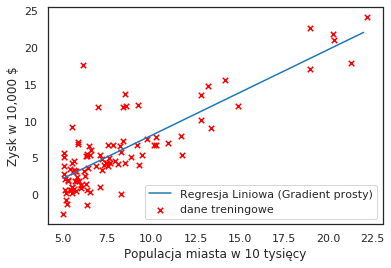

In [9]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot 
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1, label = 'dane treningowe')
plt.plot(xx,yy, label='Regresja Liniowa (Gradient prosty)')
plt.xlabel('Populacja miasta w 10 tysięcy')
plt.ylabel('Zysk w 10,000 $');
plt.legend(loc=4);

Loss function

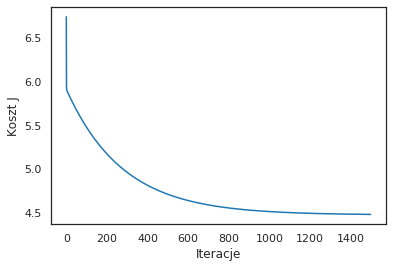

In [10]:
plt.plot(Cost_J)
plt.ylabel('Koszt J')
plt.xlabel('Iteracje');

Predict a output value of 2 citis. One with 35000 population and second with 70000 population. 

In [28]:
zysk1 = 0
zysk2 = 0
zysk1 = (theta[0] * 1 + theta[1] * 3.5) * 10000
zysk2 = (theta[0] * 1 + theta[1] * 7) * 10000
print(zysk1, zysk2)


[4519.7678677] [45342.45012945]
